In [8]:
from scipy.sparse import coo_matrix
from scipy.sparse import save_npz, load_npz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle
import csv
import time
import codecs
from scipy import spatial
from collections import OrderedDict

<span> 1. </span> Import sparse symmetric matrix.

In [2]:
mx = load_npz('C:\\FOLDERS\\CEU\\Capstone Project\\Data\\media\\media\\media_pages_sparse_matrix.npz')

In [3]:
mx_array = mx.toarray()

<span>2.</span> Define dissimilarity measures.

In [4]:
mx_corr = np.zeros((86, 86))
mx_diss = np.zeros((86, 86))
mx_cos =  np.zeros((86, 86))

In [5]:
t1 = time.time()

for i in range(0,85):
    for j in range(i+1, 86):
        mx_diss[i,j] = 100 - 100 * int(mx_array[i,j]) * int(mx_array[i,j]) / (int(np.max(mx_array[i,:])) * int(np.max(mx_array[:,j])))

print(round(time.time()-t1) / 60, 1)


0.0 1


In [9]:
t1 = time.time()

for i in range(0,85):
    for j in range(i+1, 86):
        mx_cos[i,j] = 100 * spatial.distance.cosine(mx_array[i,:], mx_array[:,j])

print(round(time.time()-t1) / 60, 1)

0.0 1


In [10]:
t1 = time.time()

for i in range(0, 85):
    for j in range(i+1, 86):
        mx_corr[i,j] = 1 - np.corrcoef(mx_array[i, :], mx_array[: , j])[1,0]

print(round((time.time()-t1) / 60, 1))

0.0


<span>3.</span> Get labels

In [11]:
labeldict = {}

f = codecs.open('C:\\FOLDERS\\CEU\\Capstone Project\\Data\\media\\media\\media oldalnevek.txt', encoding='utf_8')

for line in f:
    key =(line.split("\t")[1])
    labeldict[key] = line.split("\t")[0]

f.close()


In [12]:
labeldict = OrderedDict(sorted(labeldict.items(), key=lambda t: t[0]))

In [13]:
titles = np.array(list(labeldict.values()))

In [14]:
titles[0:10]

array(['Magyar Narancs', 'Lánchíd Rádió', 'PC Guru', 'TV Paprika',
       'Világgazdaság Online', 'Múlt-kor történelmi portál',
       'Népszava Online', 'SportHirado.hu', 'Totalcar.hu',
       'Vasárnapi Hírek'], 
      dtype='<U51')

<span>4.</span> Get categories.

In [15]:
kat_files = ["1csaladotthon.txt", "2egeszsegsport.txt", "3elmenyszorakozas.txt", "4kommersz.txt",
            "5kozelet.txt", "6technika.txt", "7tudatossag.txt", "8uzletielet.txt"]
kategoriak = [1, 2, 3, 4, 5, 6, 7, 8]

In [16]:
d = {} # dictionary of categories for the indexed pages
for i in range(0,8):
    f = open(kat_files[i], 'r')
    l = f.readlines()
    f.close()
    for j in range(0, len(l)):
        h = len(l[j])
        page = int(l[j][2:h-1])
        d[page] = kategoriak[i]

Only 74 of the 86 media pages are categorized. 

In [17]:
page_categories = {} # a dict for pages with likes where keys are page_ids and values are categories (nagykategoriak)

count = 0
for key in labeldict.keys():
    k = int(key[0:15])
    if k in d.keys():
        count += 1
count

74

<span>5. Clustering on correlation

In [18]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_corr.shape[0]):
    for j in range(i + 1, mx_corr.shape[0]):
        l.append(mx_corr[i,j])

In [19]:
Z = linkage(l, method="ward")

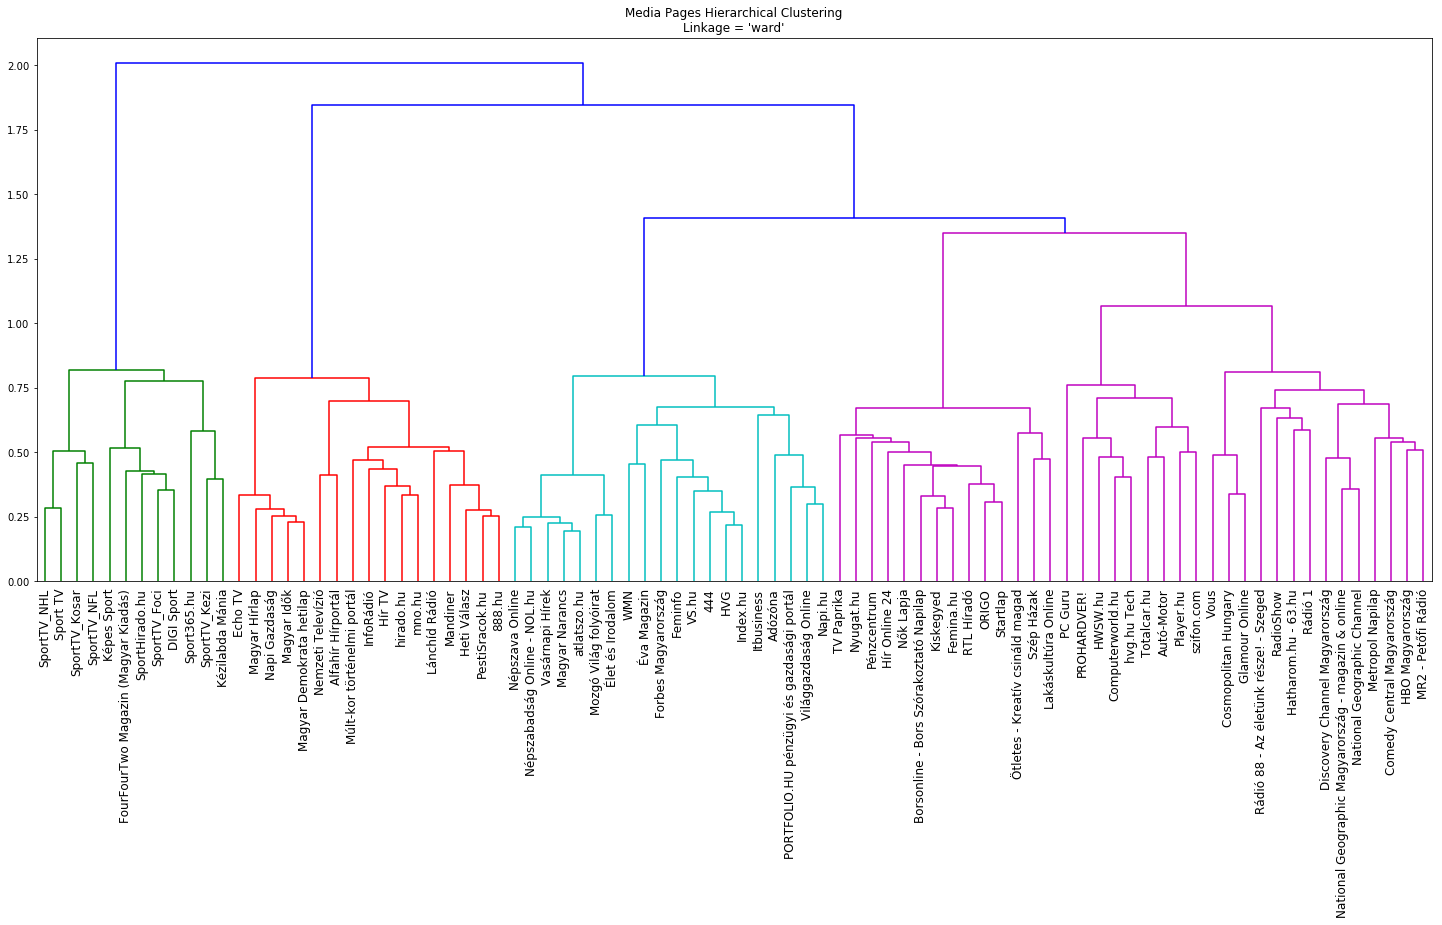

In [31]:
fig = plt.figure(figsize=(25, 10))
plt.title("Media Pages Hierarchical Clustering\nLinkage = 'ward'")
dn = dendrogram(Z,
               labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)
plt.show()

In [33]:
Z = linkage(l, method="average")

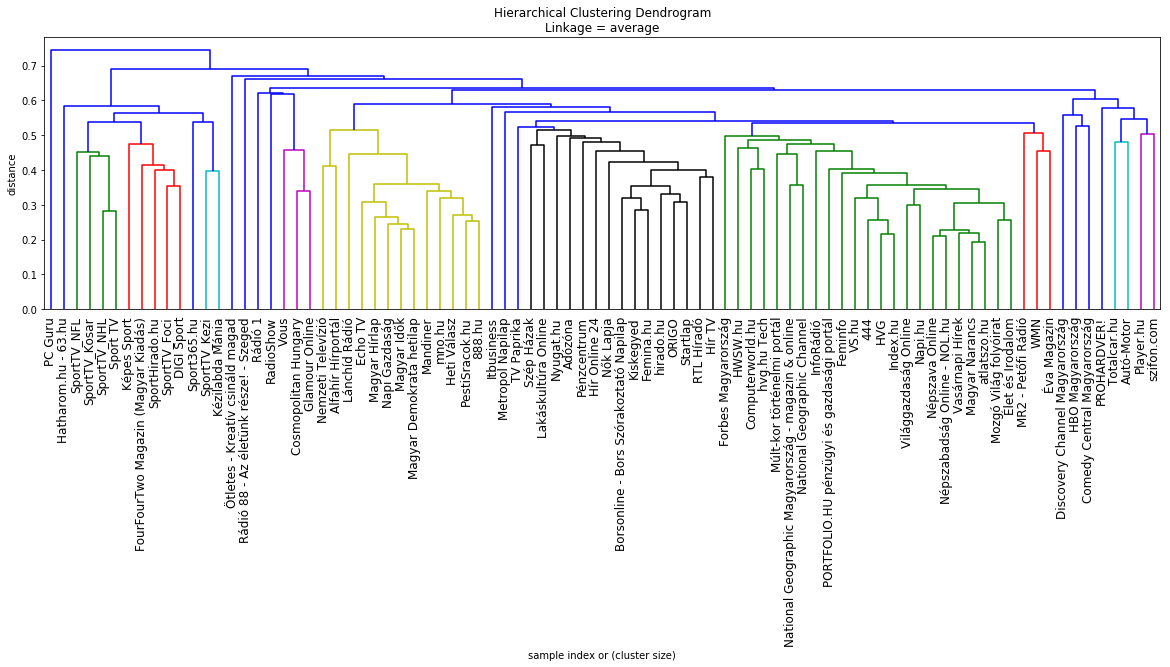

In [35]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = average')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (10,10)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

<span>6.</span> Clustering on cosine dissimilarity.

In [37]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_cos.shape[0]):
    for j in range(i + 1, mx_cos.shape[0]):
        l.append(mx_cos[i,j])

In [38]:
Z = linkage(l, method="ward")

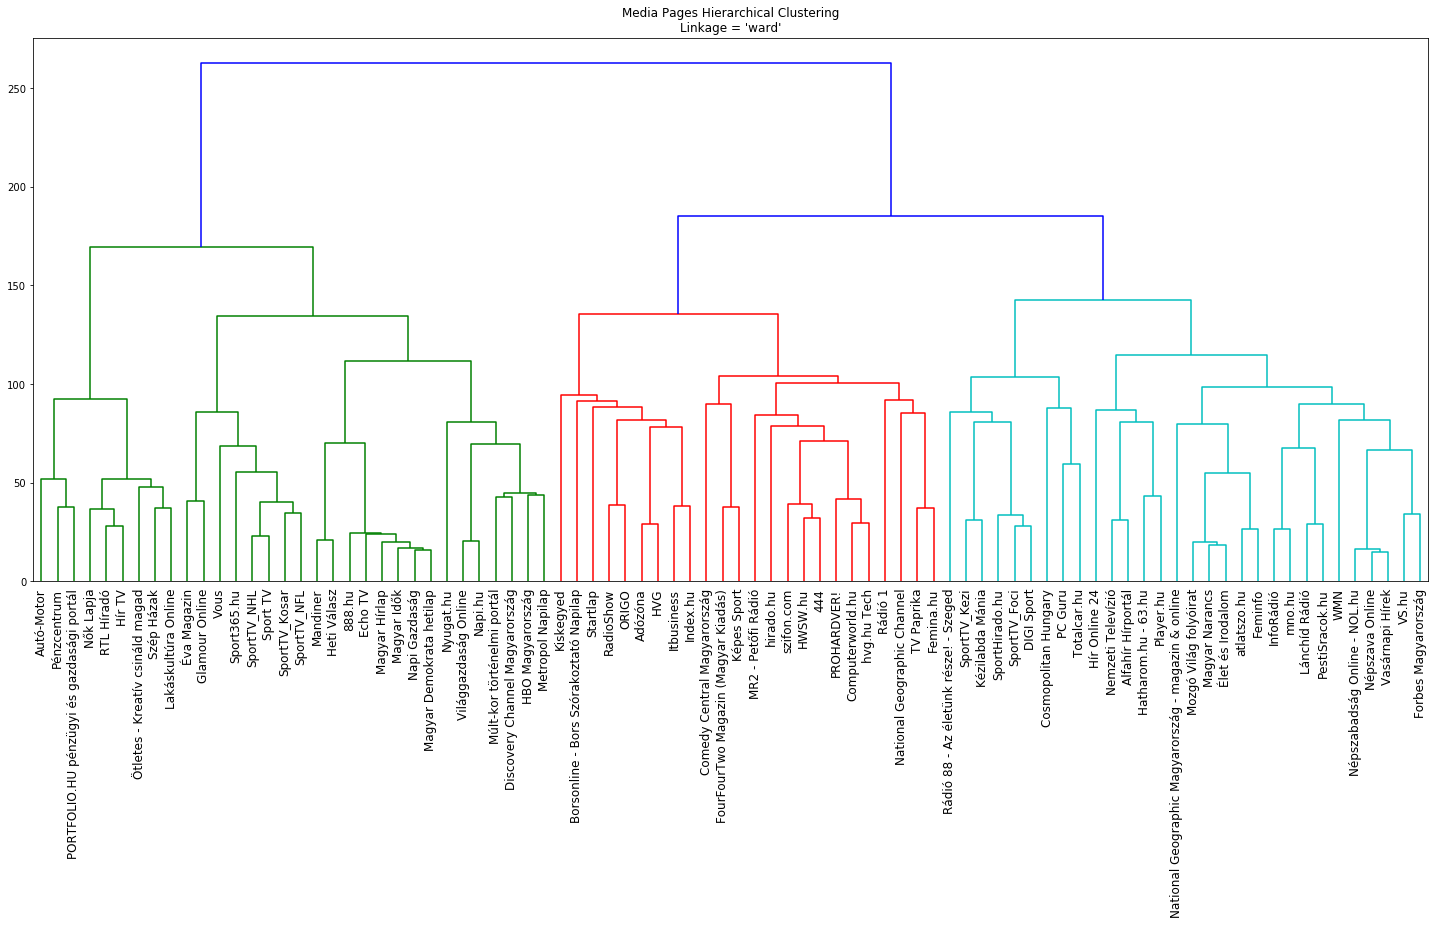

In [39]:
fig = plt.figure(figsize=(25, 10))
plt.title("Media Pages Hierarchical Clustering\nLinkage = 'ward'")
dn = dendrogram(Z,
               labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)
plt.show()

In [54]:
Z = linkage(l, method="average")

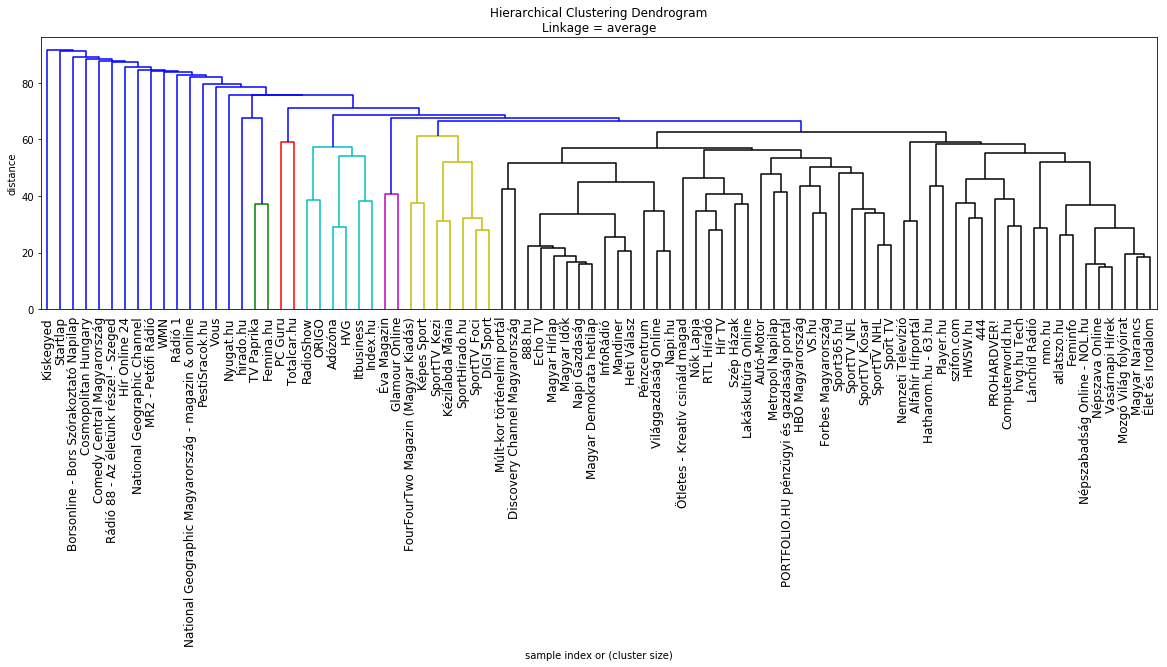

In [55]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = average')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (20,5)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

<span>7.</span> Clustering on squared differences.

In [56]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_diss.shape[0]):
    for j in range(i + 1, mx_diss.shape[0]):
        l.append(mx_diss[i,j])

In [57]:
Z = linkage(l, method="ward")

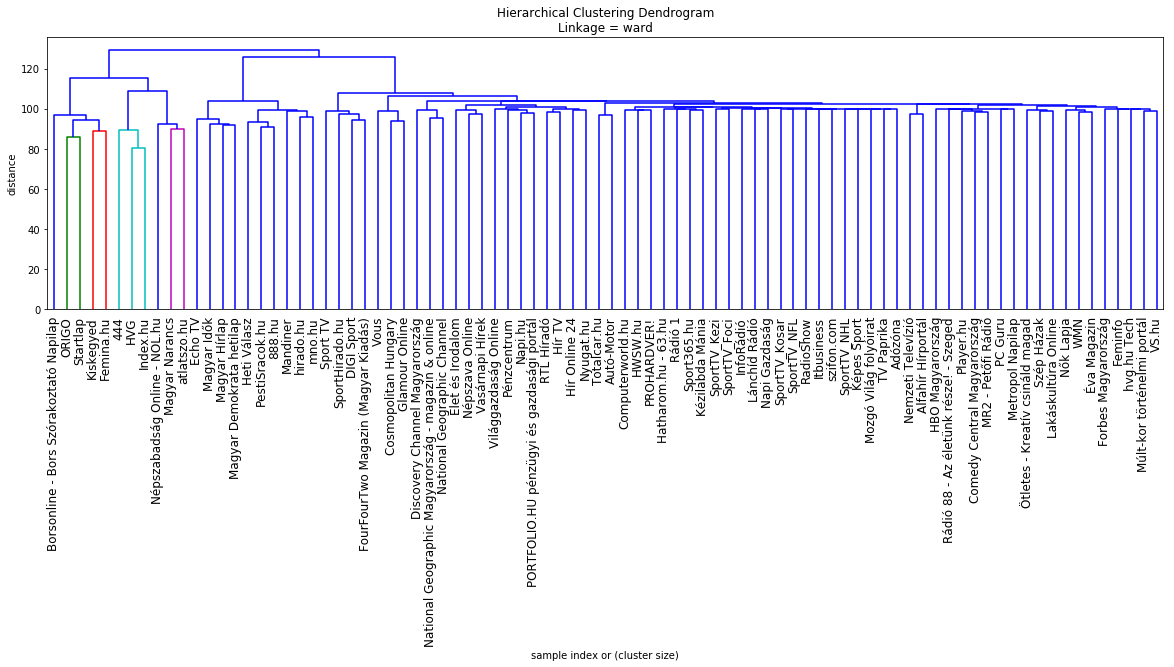

In [60]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = ward')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (20,5)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [61]:
Z = linkage(l, method="average")

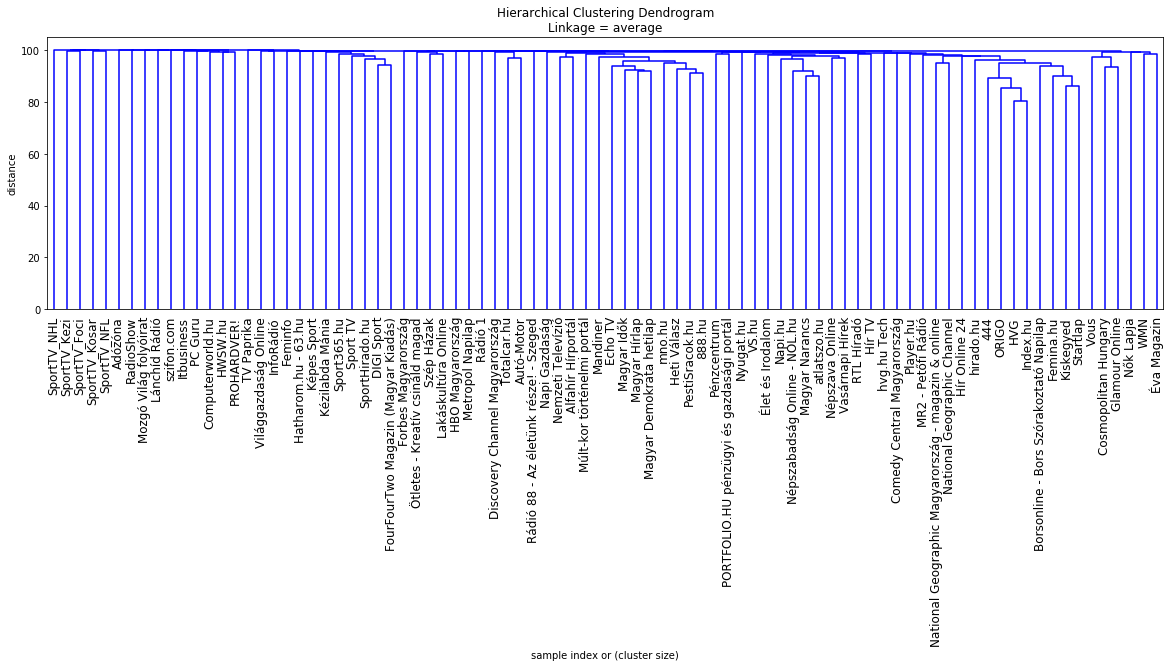

In [62]:
plt.title('Hierarchical Clustering Dendrogram\nLinkage = average')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.rcParams["figure.figsize"] = (8,5)
dendrogram(
    Z,
    labels = titles,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

<span>8.</span> Creating clusters based on correlation; distance metric: ward.

In [91]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, mx_corr.shape[0]):
    for j in range(i + 1, mx_corr.shape[0]):
        l.append(mx_corr[i,j])

In [32]:
k=6
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')

In [40]:
clusters = pd.DataFrame({"pages": titles,
                       "cluster": scipy_hier_labels.tolist()})

In [41]:
clusters_as_dictionary = {}


for element in list(set(scipy_hier_labels.tolist())):
    clusters_as_dictionary[element] = []

for i in range(len(clusters)):
    clusters_as_dictionary[clusters.loc[i][0]].append(clusters.loc[i][1])

In [46]:
table = pd.DataFrame()

for key in clusters_as_dictionary.keys():
    table = pd.concat([table, pd.Series(clusters_as_dictionary[key])], ignore_index = True, axis = 1)

In [47]:
table.columns = list(range(1,7))
table = table.fillna(value = '')

In [48]:
table

,1,2,3,4,5,6
0,SportHirado.hu,Lánchíd Rádió,Magyar Narancs,TV Paprika,PC Guru,Hatharom.hu - 63.hu
1,SportTV_NHL,Múlt-kor történelmi portál,Világgazdaság Online,Kiskegyed,Totalcar.hu,RadioShow
2,SportTV_Kezi,InfoRádió,Népszava Online,RTL Híradó,HWSW.hu,Vous
3,SportTV_Foci,Magyar Hírlap,Vasárnapi Hírek,Femina.hu,Autó-Motor,HBO Magyarország
4,DIGI Sport,Magyar Idők,Adózóna,Nők Lapja,Player.hu,Metropol Napilap
5,SportTV_Kosar,Nemzeti Televízió,HVG,Hír Online 24,PROHARDVER!,Rádió 88 - Az életünk része! - Szeged
6,Sport365.hu,Echo TV,WMN,Szép Házak,Computerworld.hu,National Geographic Magyarország - magazin & o...
7,SportTV_NFL,hirado.hu,atlatszo.hu,Nyugat.hu,szifon.com,Discovery Channel Magyarország
8,FourFourTwo Magazin (Magyar Kiadás),mno.hu,VS.hu,Pénzcentrum,hvg.hu Tech,Comedy Central Magyarország
9,Képes Sport,Napi Gazdaság,Mozgó Világ folyóirat,Lakáskultúra Online,,Cosmopolitan Hungary


In [93]:
fig.savefig("C:\\FOLDERS\\CEU\\Capstone Project\\Data\\fig_media_pages_correlation_ward.png")

In [ ]:
table.to_excel("C:\\FOLDERS\\CEU\\Capstone Project\\Data\\media_pages_correlation.ward.xls")